# Preliminaries

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Student MRP

In [26]:
P = np.array([
    [0., .5, 0., .5, 0., 0., 0.],
    [0., 0., .8, 0., 0., 0., .2],
    [0., 0., 0., 0., .4, .6, 0.],
    [.1, 0., 0., .9, 0., 0., 0.],
    [.2, .4, .4, 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 1.],
    [0., 0., 0., 0., 0., 0., 1.]
])

In [27]:
P

array([[0. , 0.5, 0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0.8, 0. , 0. , 0. , 0.2],
       [0. , 0. , 0. , 0. , 0.4, 0.6, 0. ],
       [0.1, 0. , 0. , 0.9, 0. , 0. , 0. ],
       [0.2, 0.4, 0.4, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. ]])

In [28]:
R = np.array([
    [-2.],
    [-2.],
    [-2.],
    [-1.],
    [1.],
    [10.],
    [0.]
])

In [37]:
gamma = .999999

In [38]:
V = np.linalg.inv(np.eye(7) - gamma * P) @ R

In [39]:
V

array([[-12.54296219],
       [  1.4568013 ],
       [  4.32100594],
       [-22.54274676],
       [  0.80253065],
       [ 10.        ],
       [  0.        ]])

# Sutton/Barto original Gridworld

$4 \times 4$

Nonterminal states: $\mathcal{S} = \{1, 2, 3, \ldots, 14\}$.

Actions: $\mathcal{A} = \{\text{up}, \text{down}, \text{right}, \text{left}\}$.

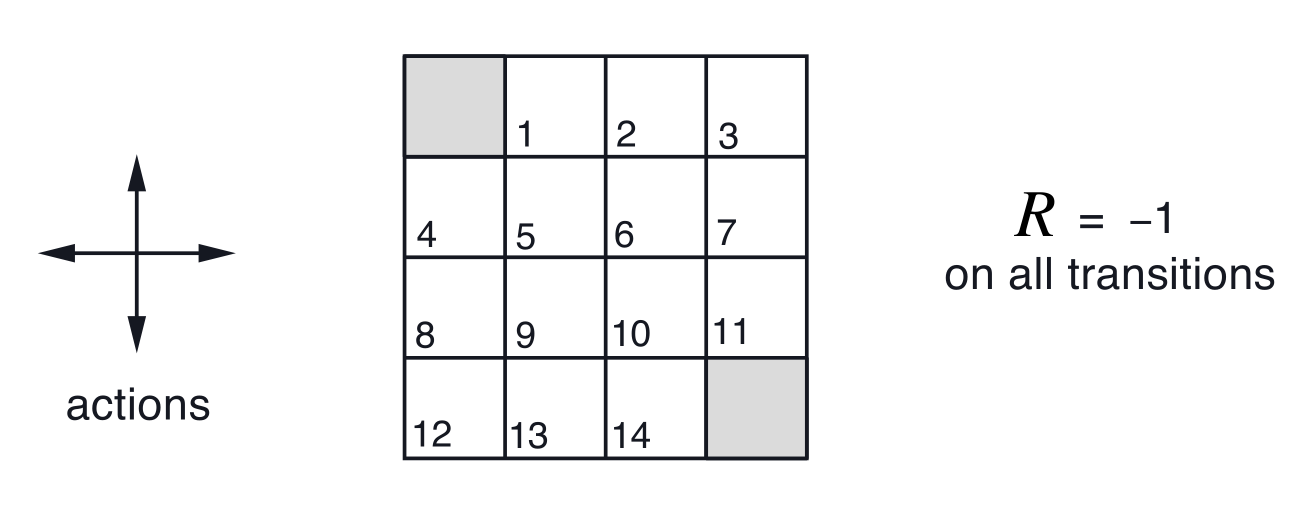

Goal: compute $v_{\pi}$ for $\pi = $ the equiprobable random policy.

In [42]:
def is_terminal(s):
    return s == 0 or s == 15

In [43]:
def up(s):
    if s == 0 or s == 15: return None
    elif s >= 1 and s <= 3: return s
    else:
        assert s >= 4 and s <= 14
        return s - 4

In [44]:
def down(s):
    if s == 0 or s == 15: return None
    elif s >= 12 and s <= 14: return s
    else:
        assert s >= 1 and s <= 11
        return s + 4

In [45]:
def left(s):
    if s == 0 or s == 15: return None
    elif s == 4 or s == 8 or s == 12: return s
    else:
        assert s >= 1 and s <= 14
        return s - 1

In [46]:
def right(s):
    if s == 0 or s == 15: return None
    elif s == 3 or s == 7 or s == 11: return s
    else:
        assert s >= 1 and s <= 14
        return s + 1

In [47]:
def pretty_print_values(values):
    print('%.00f\t%.00f\t%.00f\t%.00f' % (values[0], values[1], values[2], values[3]))
    print('%.00f\t%.00f\t%.00f\t%.00f' % (values[4], values[5], values[6], values[7]))
    print('%.00f\t%.00f\t%.00f\t%.00f' % (values[8], values[9], values[10], values[11]))
    print('%.00f\t%.00f\t%.00f\t%.00f' % (values[12], values[13], values[14], values[15]))

In [53]:
V_true = np.array([0., -14., -20., -22., -14., -18., -20., -20., -20., -20., -18., -14., -22., -20., -14., 0.])

## Dynamic programming (DP), two arrays

In [89]:
RMSE_Bellman_1 = []

In [90]:
V = [0. for _ in range(16)]

In [91]:
for k in range(100):
    V_new = [None for i in range(len(V))]
    for i in range(len(V)):
        V_new[i] = 0.
        u = up(i)
        if u is not None: V_new[i] += .25 * (-1. + V[u])
        d = down(i)
        if d is not None: V_new[i] += .25 * (-1. + V[d])
        l = left(i)
        if l is not None: V_new[i] += .25 * (-1. + V[l])
        r = right(i)
        if r is not None: V_new[i] += .25 * (-1. + V[r])
    print('Iteration %d, v: %s' % (k+1, str(V_new)))
    V = V_new
    RMSE_Bellman_1.append(np.sqrt(np.mean((np.array(V) - V_true)**2)))

Iteration 1, v: [0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0]
Iteration 2, v: [0.0, -1.75, -2.0, -2.0, -1.75, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -1.75, -2.0, -2.0, -1.75, 0.0]
Iteration 3, v: [0.0, -2.4375, -2.9375, -3.0, -2.4375, -2.875, -3.0, -2.9375, -2.9375, -3.0, -2.875, -2.4375, -3.0, -2.9375, -2.4375, 0.0]
Iteration 4, v: [0.0, -3.0625, -3.84375, -3.96875, -3.0625, -3.71875, -3.90625, -3.84375, -3.84375, -3.90625, -3.71875, -3.0625, -3.96875, -3.84375, -3.0625, 0.0]
Iteration 5, v: [0.0, -3.65625, -4.6953125, -4.90625, -3.65625, -4.484375, -4.78125, -4.6953125, -4.6953125, -4.78125, -4.484375, -3.65625, -4.90625, -4.6953125, -3.65625, 0.0]
Iteration 6, v: [0.0, -4.208984375, -5.509765625, -5.80078125, -4.208984375, -5.21875, -5.58984375, -5.509765625, -5.509765625, -5.58984375, -5.21875, -4.208984375, -5.80078125, -5.509765625, -4.208984375, 0.0]
Iteration 7, v: [0.0, -4.734375, -6.27734375, -6.6552734375, -4.734375, -5.899414062

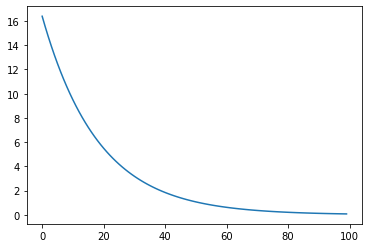

In [92]:
plt.plot(RMSE_Bellman_1)

## Dynamic programming (DP), two arrays (in-place)

In [93]:
RMSE_Bellman_2 = []

In [94]:
V = [0. for _ in range(16)]

In [95]:
for k in range(100):
    for i in range(len(V)):
        u, d, l, r = up(i), down(i), left(i), right(i)
        Vu = V[u] if u is not None else 0.
        Vd = V[d] if d is not None else 0.
        Vl = V[l] if l is not None else 0.
        Vr = V[r] if r is not None else 0.
        V[i] = 0.
        if u is not None: V[i] += .25 * (-1. + Vu)
        if d is not None: V[i] += .25 * (-1. + Vd)
        if l is not None: V[i] += .25 * (-1. + Vl)
        if r is not None: V[i] += .25 * (-1. + Vr)
    print('Iteration %d, v: %s' % (k+1, str(V)))
    RMSE_Bellman_2.append(np.sqrt(np.mean((np.array(V) - V_true)**2)))

Iteration 1, v: [0.0, -1.0, -1.25, -1.3125, -1.0, -1.5, -1.6875, -1.75, -1.25, -1.6875, -1.84375, -1.8984375, -1.3125, -1.75, -1.8984375, 0.0]
Iteration 2, v: [0.0, -1.9375, -2.546875, -2.73046875, -1.9375, -2.8125, -3.23828125, -3.404296875, -2.546875, -3.23828125, -3.568359375, -3.2177734375, -2.73046875, -3.404296875, -3.2177734375, 0.0]
Iteration 3, v: [0.0, -2.82421875, -3.8349609375, -4.175048828125, -2.82421875, -4.03125, -4.709716796875, -4.876708984375, -3.8349609375, -4.709716796875, -4.9637451171875, -4.264556884765625, -4.175048828125, -4.876708984375, -4.264556884765625, 0.0]
Iteration 4, v: [0.0, -3.672607421875, -5.09808349609375, -5.5812225341796875, -3.672607421875, -5.191162109375, -6.0324249267578125, -6.188728332519531, -5.09808349609375, -6.0324249267578125, -6.148490905761719, -5.150444030761719, -5.5812225341796875, -6.188728332519531, -5.150444030761719, 0.0]
Iteration 5, v: [0.0, -4.4904632568359375, -6.300548553466797, -6.912930488586426, -4.4904632568359375, 

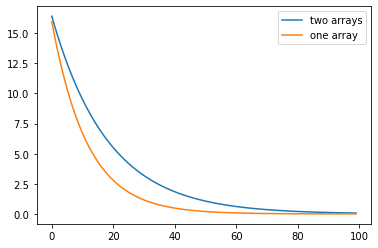

In [96]:
plt.plot(RMSE_Bellman_1, label='two arrays')
plt.plot(RMSE_Bellman_2, label='one array')
plt.legend()

## Monte Carlo - first-visit

In [104]:
gamma = 1.

In [105]:
RMSE_MC_first_visit = []

In [106]:
V = [0. for _ in range(16)]
state_returns = [[] for _ in range(16)]

In [107]:
for idx, it in enumerate(range(5000)):
    if (idx + 1) % 1000 == 0: print('Episode %d' % (idx + 1))
    states, rewards = [], []
    s = np.random.randint(16)
    states.append(s)
    while s != 0 and s != 15:
        direction = np.random.randint(4)
        if direction == 0: s = left(s)
        elif direction == 1: s = up(s)
        elif direction == 2: s = right(s)
        elif direction == 3: s = down(s)
        if s == 0 or s == 15: rewards.append(0)
        else: rewards.append(-1)
        states.append(s)
    G = 0.
    for t in range(len(states)-1, 0, -1):
        G = gamma * G + rewards[t-1]
        if states[t] not in states[:t]:
            state_returns[states[t]].append(G)
            V[states[t]] = np.mean(state_returns[states[t]])
    RMSE_MC_first_visit.append(np.sqrt(np.mean((np.array(V) - V_true)**2)))

Episode 1000
Episode 2000
Episode 3000
Episode 4000
Episode 5000


In [108]:
pretty_print_values(V)

0	-14	-19	-21
-14	-18	-19	-19
-20	-20	-17	-13
-22	-20	-13	0


(0.0, 1000.0)

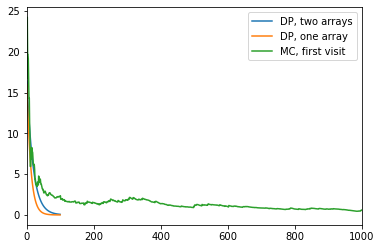

In [110]:
plt.plot(RMSE_Bellman_1, label='DP, two arrays')
plt.plot(RMSE_Bellman_2, label='DP, one array')
plt.plot(RMSE_MC_first_visit, label='MC, first visit')
plt.legend()
plt.xlim((0, 1000))

## Monte Carlo - every-visit

In [114]:
gamma = 1.

In [115]:
RMSE_MC_every_visit = []

In [116]:
V = [0. for _ in range(16)]
state_returns = [[] for _ in range(16)]

In [117]:
for idx, it in enumerate(range(5000)):
    if (idx + 1) % 1000 == 0: print('Episode %d' % (idx + 1))
    states, rewards = [], []
    s = np.random.randint(16)
    states.append(s)
    while s != 0 and s != 15:
        direction = np.random.randint(4)
        if direction == 0: s = left(s)
        elif direction == 1: s = up(s)
        elif direction == 2: s = right(s)
        elif direction == 3: s = down(s)
        if s == 0 or s == 15: rewards.append(0)
        else: rewards.append(-1)
        states.append(s)
    G = 0.
    for t in range(len(states)-1, 0, -1):
        G = gamma * G + rewards[t-1]
        state_returns[states[t]].append(G)
        V[states[t]] = np.mean(state_returns[states[t]])
    RMSE_MC_every_visit.append(np.sqrt(np.mean((np.array(V) - V_true)**2)))

Episode 1000
Episode 2000
Episode 3000
Episode 4000
Episode 5000


(0.0, 500.0)

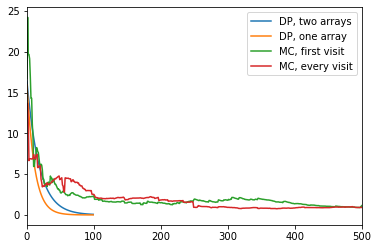

In [119]:
plt.plot(RMSE_Bellman_1, label='DP, two arrays')
plt.plot(RMSE_Bellman_2, label='DP, one array')
plt.plot(RMSE_MC_first_visit, label='MC, first visit')
plt.plot(RMSE_MC_every_visit, label='MC, every visit')
plt.legend()
plt.xlim((0, 500))